#  A logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the Education company to target potential leads.

# 1 . Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing warning 
import warnings
warnings.filterwarnings('ignore')

# 2. Importing and knowing our data

In [3]:
df= pd.read_csv("Leads.csv")
df.head(5)     # importing top 5 rows of our data 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.info()   # used info to know the column types ,values started from 0-9239 also found there are lot of values 
            # wih null values ,as in some column less rows are present 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.columns  # knowing the columns of our data 

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
df.describe()  # it shows all the numeric values of our data frame .Also found in TotalVisits,Total Time Spent on Website and Page Views Per Visit have outliers.
               # Have to treat them accordingly 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
df.shape  # df have 9240 rows and 37 columns 

(9240, 37)

# 3. Data cleaning :-

In [8]:
# first treating the missing values :
df.isna()   # knowing the missing values in full dataframe 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9238,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [9]:
df.isna().values.any()  # Its cleared that there is missing values 

True

In [10]:
#Total number of missing values
df.isna().sum()   # Found a lot of missing values in lot of columns

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
for i in df.columns:                 #DROPING THE COLUMNS IN WHICH MISING VALUES IS MORE THAN 3000
    j=df[i].isna().sum()
    if j>3000: df.drop([i],1,inplace=True)


In [12]:
df.isna().sum()   # CHECKING AGAIN THE MISISNG VALUES 

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
# fOUND STILL MISSING VALUES EXISTS ALSO FOUND CITY AND COUNTRY IS NOT REQUIRED :
df.drop(['Country','City'],1,inplace=True)

In [14]:
df.columns   # checking whether city and columns are droped or not 

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
# In our dataframe found many columns having value select .
# Finding those columns
for i in df.columns:
    j=df[i].value_counts()
    print(j)       # found three have select values:  How did you hear about X Education,Specialization,Lead Profile

852262fd-d065-4c33-96e2-1b4e6b1a2989    1
2f841572-a110-421d-932a-28beffe5d479    1
40722c7c-ac39-4b0f-960b-bf456727a929    1
eb033b66-ffee-492c-8623-c92286ff4f1d    1
06944ebc-2557-4402-aef0-f6e17d2fe39b    1
                                       ..
a5a88749-9193-4fb9-ad15-13ac1b397906    1
d41caa78-405f-469b-89af-ea8f55c27b3b    1
2088d188-0c9e-464c-b70c-ba2341864d64    1
db55c1db-8f1f-48a9-a75c-b951ff80e507    1
61922323-52c8-4aec-a30c-9c5dcec3274a    1
Name: Prospect ID, Length: 9240, dtype: int64
655360    1
604698    1
621242    1
619195    1
600768    1
         ..
593502    1
636228    1
648518    1
580937    1
608255    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

In [16]:
df['How did you hear about X Education'].value_counts()  # ours first column have select value 5043 

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [17]:
df['Specialization'].value_counts()          # ours second column have select value 1942 

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [18]:
df['Lead Profile'].value_counts()           # ours third column have select value 1942 

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [19]:
# found lead profile and How did you hear about X Education have lot of select ,not usable for analysis 
#droping these two columns
df.drop(['How did you hear about X Education','Lead Profile'],1,inplace=True)

In [20]:
df.columns   #checking the columns whether those columns are dropped ?

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [21]:
df.head(5)  #checking the dataframe again 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


#### Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. These columns have values maximum NO .Its not useful for analysis.

In [22]:
df.drop(['Do Not Call', 'Search' ,'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'],1,inplace=True)

In [23]:
df.head(5)  # checking the dataframe again

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,Modified


In [24]:
df.columns  #checking the columns 

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [25]:
df['What matters most to you in choosing a course'].value_counts()  # CLEARLY FOUND COLUMN What matters most to you in choosing a course HAVE BETTER CARRER PROSPECTS VALUES MORE 

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
# DROPPING What matters most to you in choosing a course COLUMN
df.drop(['What matters most to you in choosing a course'],1,inplace=True)

In [27]:
df.head(3)  # checking the column again 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened


In [28]:
df.isna().any()  # checking the columns have null value or not 

Prospect ID                               False
Lead Number                               False
Lead Origin                               False
Lead Source                                True
Do Not Email                              False
Converted                                 False
TotalVisits                                True
Total Time Spent on Website               False
Page Views Per Visit                       True
Last Activity                              True
Specialization                             True
What is your current occupation            True
A free copy of Mastering The Interview    False
Last Notable Activity                     False
dtype: bool

In [29]:
df.isna().sum()  # still found a lot of missing values 

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [30]:
df['What is your current occupation'].value_counts() #checkiing values of What is your current occupation 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
# we cant drop the column as it is a important column ,so will drop the rows having null values 
df=df[~pd.isnull(df['What is your current occupation'])]

In [32]:
df  # checking the data frame 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,1,5.0,210,2.50,SMS Sent,Business Administration,Unemployed,No,Modified
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Yes,SMS Sent


In [33]:
df.isnull().sum()  # checking the null values again 

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [34]:
df['TotalVisits'].value_counts() #checkiing values of TotalVisits 

0.0      1375
2.0      1228
3.0       940
4.0       825
5.0       578
6.0       337
1.0       270
7.0       225
8.0       163
9.0       128
10.0       76
11.0       70
13.0       39
12.0       31
14.0       28
16.0       16
15.0       14
17.0       12
18.0       12
20.0       10
19.0        6
27.0        5
23.0        5
21.0        5
24.0        3
25.0        3
22.0        3
26.0        2
29.0        2
55.0        1
251.0       1
74.0        1
42.0        1
28.0        1
115.0       1
43.0        1
30.0        1
32.0        1
Name: TotalVisits, dtype: int64

In [35]:
df=df[~pd.isnull(df['TotalVisits'])] # removing the misisng rows from Total visits 

In [36]:
df.isna().sum()  # checking the null values for full dataframe

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [37]:
df['Lead Source'].value_counts()  # checking the values of lead source 

Google               2048
Direct Traffic       1891
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Live Chat               2
Social Media            2
WeLearn                 1
Press_Release           1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64

In [38]:
# removing the null values of column lead source
df=df[~pd.isnull(df['Lead Source'])]

In [39]:
df.isna().sum() # checking the null values 

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [40]:
df['Specialization'].value_counts() # checking the values in specilization 

Select                               1838
Finance Management                    745
Human Resource Management             665
Marketing Management                  663
Operations Management                 391
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 122
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: Specialization, dtype: int64

In [41]:
df = df[~pd.isnull(df['Specialization'])]  # dropping the values 

In [42]:
df.isna().sum() # checking the null values 

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [43]:
 df.head(5)  # checking our final dataset after cleaning 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [44]:
# Also found Prospect and Lead Number is not required in our dataframe
df.drop(['Prospect ID','Lead Number'],1,inplace=True)

In [45]:
df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,Unemployed,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,No,1,5.0,210,2.50,SMS Sent,Business Administration,Unemployed,No,Modified
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Yes,SMS Sent


In [46]:
df['Converted'].value_counts()  # Found 3065 were converted and 3308 were not converted 

0    3308
1    3065
Name: Converted, dtype: int64

# 4. Visuilization :

<Figure size 720x720 with 0 Axes>

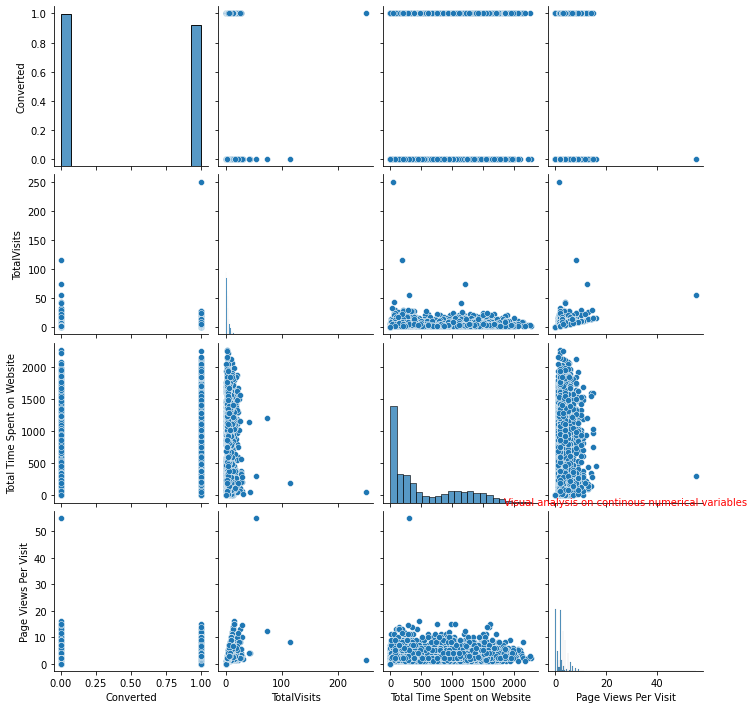

In [47]:
#Analysizing and visualizing numerical variables. 
plt.figure(figsize=(10,10))
sns.pairplot(data=df,vars=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
plt.title("Visual analysis on continous numerical variables",fontdict={'fontsize':10,'fontweight':10,'color':'Red'})
plt.show()

#### OBSERVATIONS: FOUND A KIND OF LINEAR RELATIONSHIP TOTAL VISITS ADN PAGE VIEWS PER VISIT. 

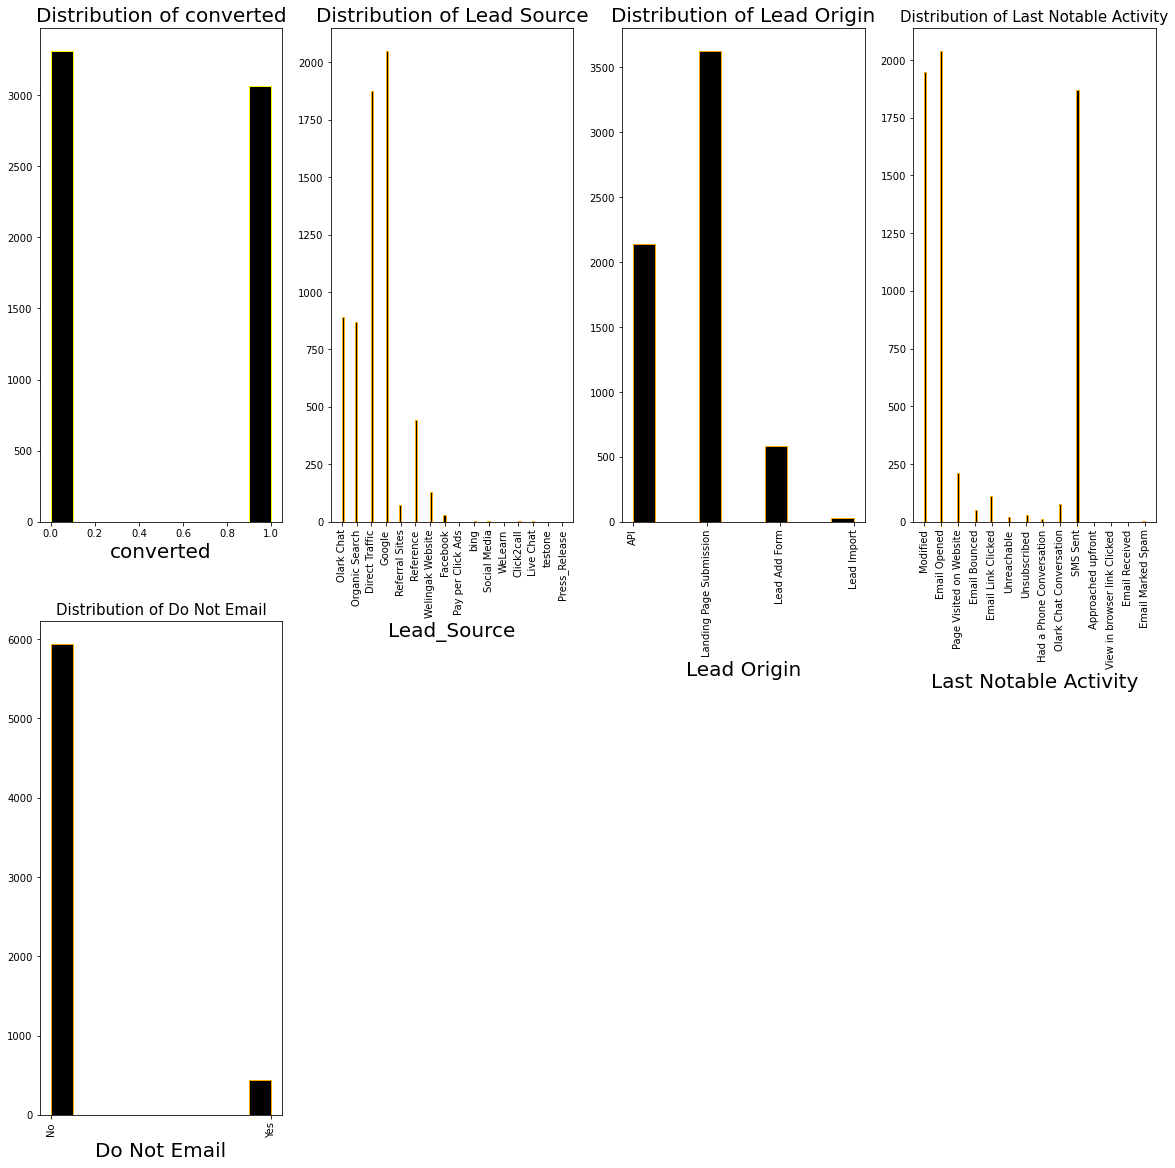

In [48]:
# Frequency distribution of all categorical values by using HISTOGRAM in subplot
plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
plt.hist(df.Converted,bins=10,edgecolor='yellow',color='black')
plt.title('Distribution of converted',fontdict={'fontsize':20,'fontweight':5,'color':'black'})
plt.xlabel('converted',fontdict={'fontsize':20,'fontweight':5,'color':'black'})
plt.subplot(2,4,2)
plt.hist(df['Lead Source'],bins=100,edgecolor='orange',color='black')
plt.title('Distribution of Lead Source',fontdict={'fontsize':20,'fontweight':5,'color':'black'})
plt.xlabel('Lead_Source',fontdict={'fontsize':20,'fontweight':5,'color':'black'})
plt.xticks(rotation=90)
plt.subplot(2,4,3)
plt.hist(df['Lead Origin'],bins=10,edgecolor='orange',color='black')
plt.title('Distribution of Lead Origin',fontdict={'fontsize':20,'fontweight':5,'color':'black'})
plt.xlabel('Lead Origin',fontdict={'fontsize':20,'fontweight':5,'color':'black'})
plt.xticks(rotation=90)
plt.subplot(2,4,4)
plt.hist(df['Last Notable Activity'],bins=100,edgecolor='orange',color='black')
plt.title('Distribution of Last Notable Activity',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
plt.xlabel('Last Notable Activity',fontdict={'fontsize':20,'fontweight':5,'color':'black'})
plt.xticks(rotation=90)
plt.subplot(2,4,5)
plt.hist(df['Do Not Email'],bins=10,edgecolor='orange',color='black')
plt.title('Distribution of Do Not Email',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
plt.xlabel('Do Not Email',fontdict={'fontsize':20,'fontweight':5,'color':'black'})
plt.xticks(rotation=90)
plt.show()


#### Found distribution of coverted rate is less than no lead ,and in lead source google have more distribution ,lead orgin = landing page have more distribution ,ln last activity email opened and sms sent have more distribution and do not email sent NO have more distribution in our dataset 

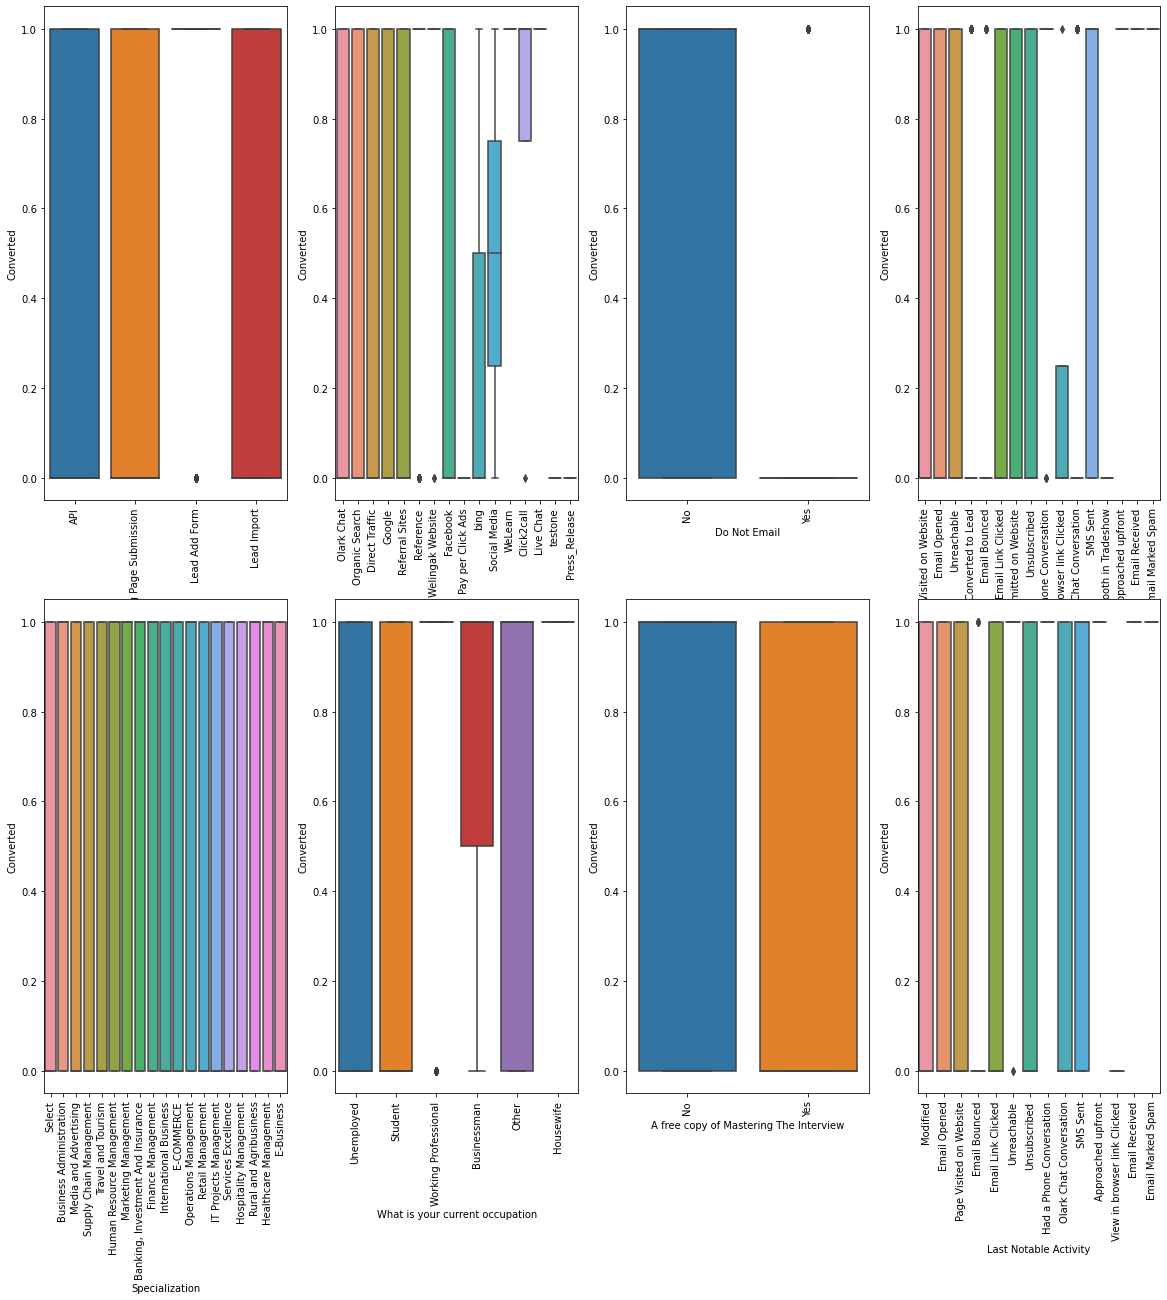

In [49]:
# visuilization of categorical values :
plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
sns.boxplot(x = 'Lead Origin', y = 'Converted', data = df)
plt.xticks(rotation=90) # rotating x values to 90 degree

plt.subplot(2,4,2)
sns.boxplot(x = 'Lead Source', y = 'Converted', data = df)
plt.xticks(rotation=90) # rotating x values to 90 degree

plt.subplot(2,4,3)
sns.boxplot(x = 'Do Not Email', y = 'Converted', data = df)
plt.xticks(rotation=90)# rotating x values to 90 degree

plt.subplot(2,4,4)
sns.boxplot(x = 'Last Activity', y = 'Converted', data = df)
plt.xticks(rotation=90)# rotating x values to 90 degree

plt.subplot(2,4,5)
sns.boxplot(x = 'Specialization', y = 'Converted', data = df)
plt.xticks(rotation=90)

plt.subplot(2,4,6)
sns.boxplot(x = 'What is your current occupation', y = 'Converted', data = df)
plt.xticks(rotation=90)# rotating x values to 90 degree
plt.subplot(2,4,7)
sns.boxplot(x = 'A free copy of Mastering The Interview', y = 'Converted', data = df)
plt.xticks(rotation=90)# rotating x values to 90 degree
plt.subplot(2,4,8)
sns.boxplot(x = 'Last Notable Activity', y = 'Converted', data = df)
plt.xticks(rotation=90)# rotating x values to 90 degree
plt.show()

## Assumptions: 
-free copy of mastering the interview both values yes and no are converted 
-Customer who choosed do not email No ,are converted 
-Also found customer of different specilization are converted
-maximum from google search ,organic ,direct traffic etc are converted 
-In the last labled activity customers who opened email,visted the website,chat with olark and link clicked were converted 
-Customers who opned email,sms,visted the websited and clicked the link in there last activity were converted 

# 5. Dummy variables creation

In [50]:
# Creating the dummy variables using the 'get_dummies' 
dum = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

In [51]:
dum  # checking the dummy table

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [52]:
#join the dum/dummy tables with the original tables
df_new = pd.concat([df, dum], axis=1)

In [53]:
df_new.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0


In [54]:
# We have to create dummy table seprate for specilization as all the value are important.
# And we have to drop select from the dummy table of specilization 
dum1=pd.get_dummies(df['Specialization'],prefix = 'Specialization')

In [55]:
dum1.head(2)  # as we can see Specialization_Select column in dataframe 

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
# HAVE TO DROP Specialization_Select FROM DUM1
dum1.drop(['Specialization_Select'],1,inplace=True)

In [57]:
dum1.head(2) # checking the dataframe

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
# #join the dum1/dummy tables with the original tables
df_new = pd.concat([df_new, dum1], axis=1)

In [59]:
df_new.head(4) # CHECKED THE DATA FRAME

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [60]:
# NEED TO DROP THOSE COLUMNS WHOOSE DUMMY VARIABLE IS CREATED 
df_new = df_new.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [61]:
# FINAL DATAFRAME 
df_new.head(4)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
df_new.shape  # final data have 6373 rows and 75 columns

(6373, 75)

# 6. Train -Test split 

In [63]:
#importing train tesdt split from sklearn
from sklearn.model_selection import train_test_split

In [64]:
# getting the x  value from main data frame df_new
x=df_new.drop(['Converted'],1)
x.head(3)  # fetching the top 3 rows of x data frame 

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#getting y_train value from the main data frame df_new
y= df_new['Converted']
y

0       0
1       0
2       1
3       0
4       1
       ..
9234    1
9235    1
9236    0
9237    0
9239    1
Name: Converted, Length: 6373, dtype: int64

In [66]:
# Splitting  the dataset into 70% of train data and 30% of test data 

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [67]:
X_train.head(3)  # knowing x_train  data

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,4.0,67,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,4.0,187,4.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,6.0,78,6.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
X_train.shape  # checking the x_train shape whether is it divided correctly 

(4461, 74)

In [69]:
X_test.shape   # found test data is divided correctly in to 30%

(1912, 74)

In [70]:
X_test.head(3)   # checking the x_test shape whether is it divided correctly 

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6122,7.0,66,7.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9202,4.0,947,4.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y_train  # checking the y_train data 

8003    0
218     0
4171    1
4037    1
3660    1
       ..
8759    1
100     0
5877    0
8658    0
8217    0
Name: Converted, Length: 4461, dtype: int64

In [72]:
y_train.shape  #checking the percentage divided in train and test data in terms of y 

(4461,)

In [73]:
y_test.shape   # checking the shape of y_test data 

(1912,)

# 7.Scaling down the values by using MinMaxscaler 

In [74]:
# Importing MinMaxscaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [75]:
val=['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']  # made one list with all column listed which need to be scaled 
X_train[val]=scale.fit_transform(X_train[val])  # used fit_transform to sclaed down the value
X_train                                         # checking the value is sclaed down ?

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.12500,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.25000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.37500,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.00000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,0.000000,0.000000,0.00000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0.027888,0.718750,0.21875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5877,0.011952,0.752201,0.18750,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8658,0.015936,0.187060,0.12500,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 8.Checking multicollinearity by using heatmap

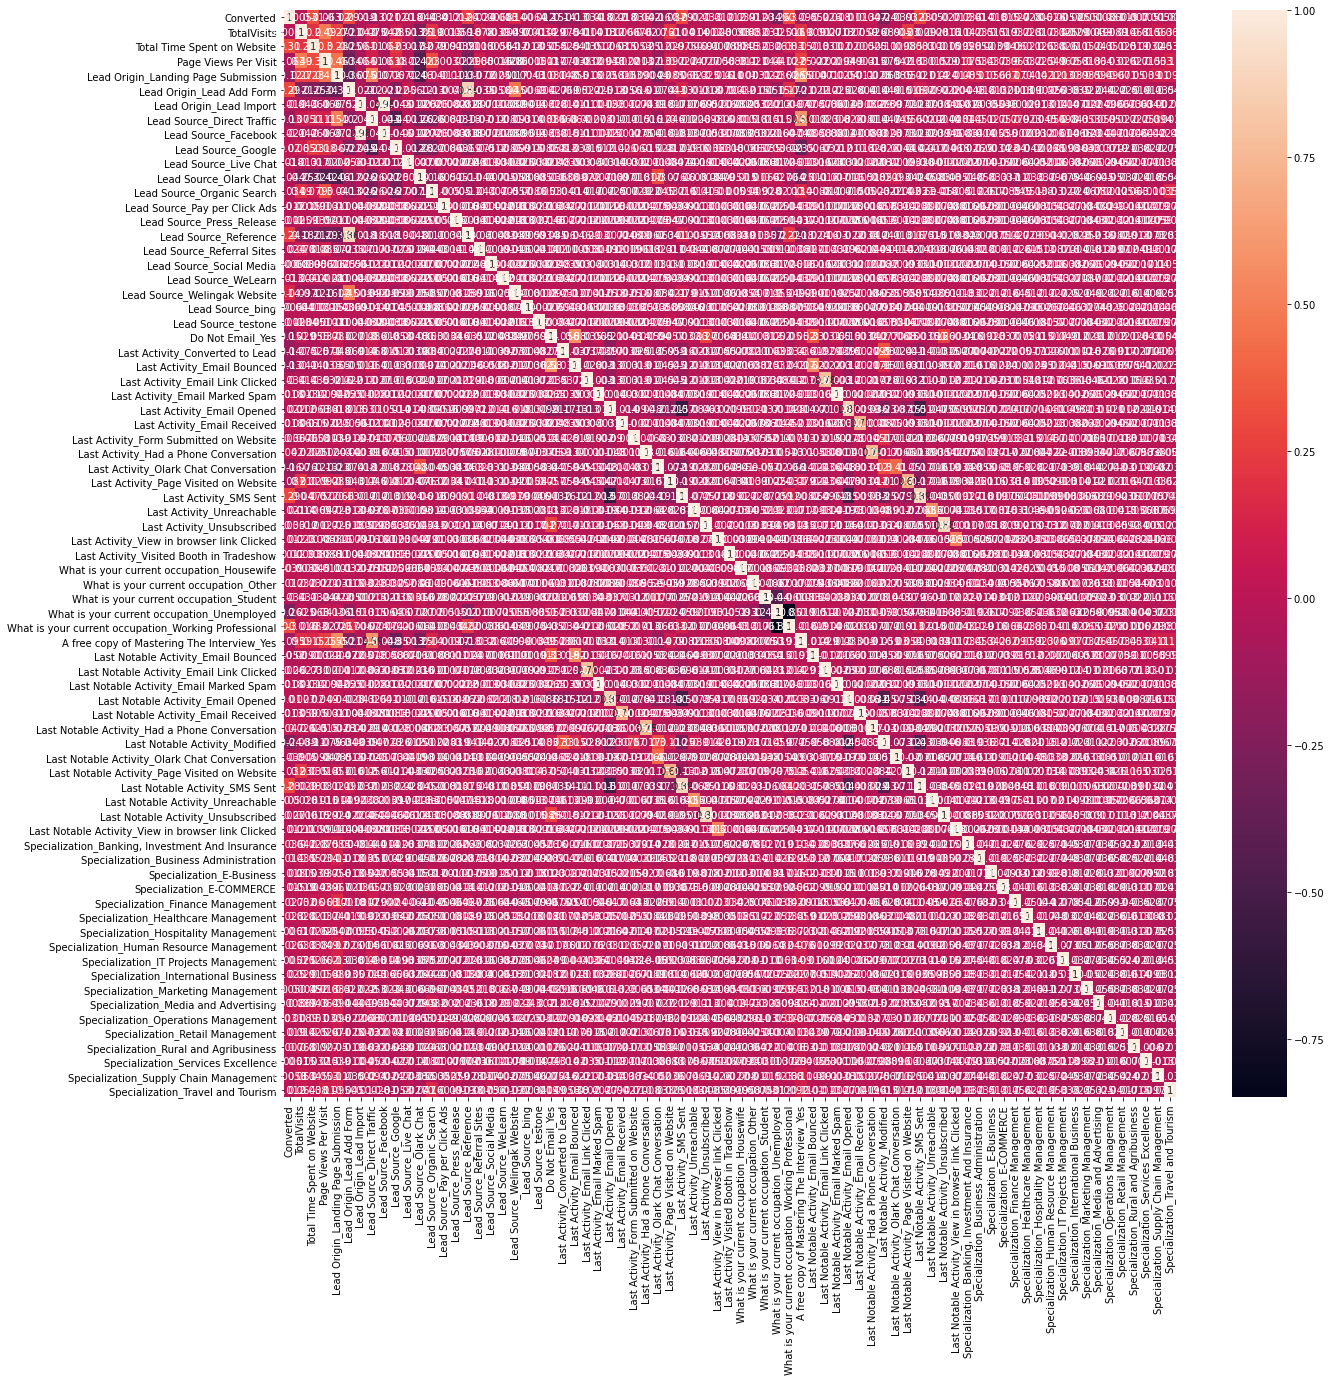

In [76]:
plt.figure(figsize=(20,20))  # corr()/correlation function to check multicollinearity using heatmap
sns.heatmap(df_new.corr(),annot=True)
plt.show()

### Found we have large number of variables in heatmap ,unable to treat .So taking a some subset of data /particular feature from the all these variable then will treat multicollinearity .So Have to RFE  

# 9. Building logistic regression model ,as its a classification problem 

In [77]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

##### Using RFE (selecting top 15 feature) 

In [78]:
# Importing RFE and selecting top 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)   # fitting rfe to x_train and Y_train

In [79]:
# NOW CHECKING WHICH FEATURE IS SELECTED AND WHICH IS NOT SELECTED 

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [80]:
# INSERTING THE PARTICULAR SELECTED COLUMN INSIDE cole

cole = X_train.columns[rfe.support_]
cole

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [81]:
# Now removing the unwanted column and selecting only the 15 top columns from x-train
X_train=X_train[cole]
X_train.head(3)         # extracted top 15 columns in to the X_train

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,0,1,0,0,1,0,0,0
218,0.015936,0.082306,0,0,0,0,0,0,0,0,0,1,0,0,0
4171,0.023904,0.034331,0,0,0,0,0,0,0,0,0,1,0,0,0


## Using statsmodel.api for making model

In [82]:
import statsmodels.api as sm

In [83]:
X_train_sm= sm.add_constant(X_train) # as in statsmodel need to add consatnt to x_train
X_train_sm.head(3)

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,1.0,0.015936,0.029489,0,0,0,0,0,0,1,0,0,1,0,0,0
218,1.0,0.015936,0.082306,0,0,0,0,0,0,0,0,0,1,0,0,0
4171,1.0,0.023904,0.034331,0,0,0,0,0,0,0,0,0,1,0,0,0


# 9.1   First model : Building and checking the summary 

In [84]:
log1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Sun, 05 Dec 2021   Deviance:                       4145.5
Time:                        20:12:10   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

In [85]:
# Importing variance_inflation_factor( VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# Creating a VIF dataframe for all the variables present and checking the VIF 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


#### Observation:   Found VIF is very high for three variables  Lead Origin_Lead Add Form,Lead Source_Reference	,Lead Source_Welingak Website.Also have to check the P value for these variables.Among the three Lead Source_Reference have high p value of 0.285 which is greater than 0.05 .Have to Eliminate 

# 9.2. Second model after eliminating Lead Source_Reference

In [87]:
X_train=X_train.drop(['Lead Source_Reference'],1)  # removing the lead source refrence column from X_train
X_train

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,1,0,0,1,0,0,0
218,0.015936,0.082306,0,0,0,0,0,0,0,0,1,0,0,0
4171,0.023904,0.034331,0,0,0,0,0,0,0,0,1,0,0,0
4037,0.000000,0.000000,0,1,0,0,0,0,0,0,1,0,0,0
3660,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,0.000000,0.000000,1,0,0,0,0,1,0,0,1,0,0,0
100,0.027888,0.718750,0,0,0,0,0,0,0,0,1,0,0,0
5877,0.011952,0.752201,0,0,0,0,0,1,0,0,1,0,0,0
8658,0.015936,0.187060,0,0,0,0,0,0,0,0,1,0,0,0


In [88]:
X_train_sm= sm.add_constant(X_train) # as in statsmodel need to add consatnt to x_train
X_train_sm.head(3)

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8003,1.0,0.015936,0.029489,0,0,0,0,0,1,0,0,1,0,0,0
218,1.0,0.015936,0.082306,0,0,0,0,0,0,0,0,1,0,0,0
4171,1.0,0.023904,0.034331,0,0,0,0,0,0,0,0,1,0,0,0


In [89]:
log2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
log2.summary()  # fitting second model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Sun, 05 Dec 2021   Deviance:                       4146.5
Time:                        20:12:10   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [90]:
# Creating a VIF dataframe for all the variables present and checking the VIF 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


#### Observation : Found VIF is controlled and it is less than 5. but p value is more for some fetures ,Last Notable Activity_Had a Phone Conversation have more P value also with little higher vif value as compared with others.Need to drop .

# 9.3 Third model by dropping Last Notable Activity_Had a Phone Conversation 

In [91]:
X_train=X_train.drop(['Last Notable Activity_Had a Phone Conversation'],1)  # dropped the Last Notable Activity_Had a Phone Conversation column
X_train.head(2)

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,1,0,0,1,0,0
218,0.015936,0.082306,0,0,0,0,0,0,0,0,1,0,0


In [92]:
X_train_sm= sm.add_constant(X_train) # as in statsmodel need to add consatnt to x_train
X_train_sm.head(3)

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8003,1.0,0.015936,0.029489,0,0,0,0,0,1,0,0,1,0,0
218,1.0,0.015936,0.082306,0,0,0,0,0,0,0,0,1,0,0
4171,1.0,0.023904,0.034331,0,0,0,0,0,0,0,0,1,0,0


In [93]:
log3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
log3.summary()  # fitting third model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Sun, 05 Dec 2021   Deviance:                       4152.2
Time:                        20:12:10   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

In [94]:
# Creating a VIF dataframe for all the variables present and checking the VIF 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
5,Do Not Email_Yes,1.09
9,What is your current occupation_Student,1.09


#### Observation:   Seems like VIF is fully controlled .But have to delete What is your current occupation_Housewife column as it has 0.999 high p value .Need to drop

# 9.4 Fourth model bt dropping What is your current occupation_Housewife column

In [95]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True) # dropping column named What is your current occupation_Housewife
X_train.head(2)

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,1,0,1,0,0
218,0.015936,0.082306,0,0,0,0,0,0,0,1,0,0


In [96]:
X_train_sm= sm.add_constant(X_train) # as in statsmodel need to add consatnt to x_train
X_train_sm.head(3)

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8003,1.0,0.015936,0.029489,0,0,0,0,0,1,0,1,0,0
218,1.0,0.015936,0.082306,0,0,0,0,0,0,0,1,0,0
4171,1.0,0.023904,0.034331,0,0,0,0,0,0,0,1,0,0


In [97]:
log4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
log4.summary()  # fitting fourth model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Sun, 05 Dec 2021   Deviance:                       4156.7
Time:                        20:12:10   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

In [98]:
# Creating a VIF dataframe for all the variables present and checking the VIF 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.64
1,Total Time Spent on Website,2.37
2,Lead Origin_Lead Add Form,1.70
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
5,Do Not Email_Yes,1.09
8,What is your current occupation_Student,1.09


#### Observation : Seems like VIF is fully controlled .But have to delete What is your current occupation_Housewife column as it has 0.212 high p value .Need to drop What is your current occupation_Working Professional

# 9.5 Fifth model by eliminating What is your current occupation_Working Professional

In [99]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)
X_train.head(2)  # removed column name What is your current occupation_Working Professional

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
8003,0.015936,0.029489,0,0,0,0,0,1,0,1,0
218,0.015936,0.082306,0,0,0,0,0,0,0,1,0


In [100]:
X_train_sm= sm.add_constant(X_train) # as in statsmodel need to add consatnt to x_train
X_train_sm.head(3)
log5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
log5.summary()  # fitting fifth model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Sun, 05 Dec 2021   Deviance:                       4158.1
Time:                        20:12:11   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [101]:
# Creating a VIF dataframe for all the variables present and checking the VIF 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


#### OBSERVATIONS: Now our model log5 is ready for predictions ,as both p value and VIF value is controlled  

# 10. Predictions on train data 

In [102]:
y_train_pred = log5.predict(X_train_sm)  # using .predict functions to predict values on train data itself 
y_train_pred

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
          ...   
8759    0.954795
100     0.759334
5877    0.909280
8658    0.208249
8217    0.370186
Length: 4461, dtype: float64

In [103]:
# Reshaping it into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

In [104]:
# Now crearting a data frame with actual values and predicted values 
df_nakli= pd.DataFrame({'ACTUAL':y_train,'PREDICTED':y_train_pred})
df_nakli

,ACTUAL,PREDICTED
8003,0,0.300117
218,0,0.142002
4171,1,0.127629
4037,1,0.291558
3660,1,0.954795
...,...,...
8759,1,0.954795
100,0,0.759334
5877,0,0.909280
8658,0,0.208249


In [105]:
df_nakli['CONVERTED_PREDICTED']=[1 if i>0.5 else 0 for i in df_nakli['PREDICTED']] # using classic list comprenhensation 

In [106]:
df_nakli  # checking the dataframe again 

,ACTUAL,PREDICTED,CONVERTED_PREDICTED
8003,0,0.300117,0
218,0,0.142002,0
4171,1,0.127629,0
4037,1,0.291558,0
3660,1,0.954795,1
...,...,...,...
8759,1,0.954795,1
100,0,0.759334,1
5877,0,0.909280,1
8658,0,0.208249,0


# 11.  evaluation  by some metrices 

In [107]:
from sklearn import metrics  # importing metrics

In [108]:
confusion = metrics.confusion_matrix(df_nakli.ACTUAL, df_nakli.CONVERTED_PREDICTED )
print(confusion)  # printing confusion metrics

[[1929  383]
 [ 560 1589]]


In [109]:
# checking accuray 
print(metrics.accuracy_score(df_nakli.ACTUAL, df_nakli.CONVERTED_PREDICTED ))

0.7886124187401928


In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
#Finding  Recall 
recall= TP/(TP+FN)
recall

0.739413680781759

In [112]:
# FINDING PRECISION
Precision= TP/(TP+FP)
Precision

0.8057809330628803

In [113]:
# f1 SCORE
f1=2*(recall*Precision)/(recall+Precision)
f1

0.7711720456199951

In [114]:
# cresting function for RUC 

def curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( df_nakli.ACTUAL, df_nakli.PREDICTED, drop_intermediate = False )


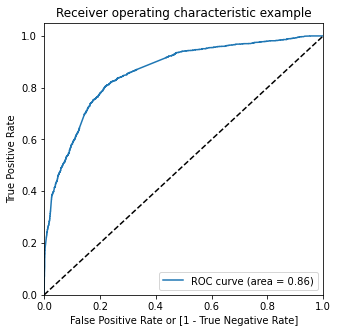

In [116]:
curve(df_nakli.ACTUAL, df_nakli.PREDICTED)


### OBSERVATIONS: Found region under curve is 0.86 .It looks like good model .But need to check the in cut off range

In [117]:
cut=[float(i/10) for i in range(10)]  # used list comphrehensation method to have different cut value in one list 
cut

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [118]:
for i in cut:   # used for loop and classic list comprehensation method 
    df_nakli[i]=[1 if j>i else 0 for j  in df_nakli['PREDICTED'] ]
    

In [119]:
df_nakli  # chgecking data frame 

,ACTUAL,PREDICTED,CONVERTED_PREDICTED,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8003,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
218,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
4171,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
4037,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
3660,1,0.954795,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,1,0.954795,1,1,1,1,1,1,1,1,1,1,1
100,0,0.759334,1,1,1,1,1,1,1,1,1,0,0
5877,0,0.909280,1,1,1,1,1,1,1,1,1,1,1
8658,0,0.208249,0,1,1,1,0,0,0,0,0,0,0


In [120]:
new_cut=pd.DataFrame(columns=['PROB','ACCURACY','SENSI','SPECI'])
new_cut  # CREATING ONE EMPTY DATAFRAME 

,PROB,ACCURACY,SENSI,SPECI


In [121]:
for i in cut :
    confusing_full=metrics.confusion_matrix(df_nakli.ACTUAL, df_nakli[i] )
    total1=sum(sum(confusing_full))
    ACCURACY = (confusing_full[0,0]+confusing_full[1,1])/total1
    
    SPECI = confusing_full[0,0]/(confusing_full[0,0]+confusing_full[0,1])
    SENSI = confusing_full[1,1]/(confusing_full[1,0]+confusing_full[1,1])
    new_cut.loc[i] =[ i ,ACCURACY,SPECI,SENSI]
print(new_cut)
    
    

     PROB  ACCURACY     SENSI     SPECI
0.0   0.0  0.481731  0.000000  1.000000
0.1   0.1  0.527012  0.092561  0.994416
0.2   0.2  0.698274  0.469723  0.944160
0.3   0.3  0.767541  0.676038  0.865984
0.4   0.4  0.791975  0.774654  0.810610
0.5   0.5  0.788612  0.834343  0.739414
0.6   0.6  0.757229  0.881055  0.624011
0.7   0.7  0.735037  0.913062  0.543509
0.8   0.8  0.711500  0.951557  0.453234
0.9   0.9  0.644026  0.982699  0.279665


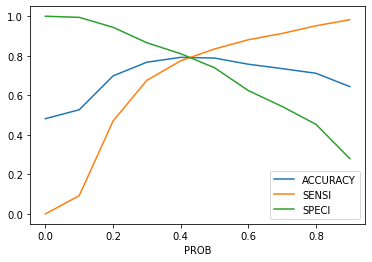

In [122]:
# Ploting for excat cutoff
new_cut.plot.line(x='PROB', y=['ACCURACY','SENSI','SPECI'])
plt.show()

#### As we found around 0.42 is optimal value where all the three metrics intersect between each other . 

In [123]:
df_nakli['Final_prediction']=[1 if j>0.42 else 0 for j  in df_nakli['PREDICTED'] ]  # cutting with the final cutoff 0.42

In [124]:
df_nakli  

,ACTUAL,PREDICTED,CONVERTED_PREDICTED,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_prediction
8003,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
218,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
4171,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
4037,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
3660,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1
100,0,0.759334,1,1,1,1,1,1,1,1,1,0,0,1
5877,0,0.909280,1,1,1,1,1,1,1,1,1,1,1,1
8658,0,0.208249,0,1,1,1,0,0,0,0,0,0,0,0


In [125]:
df_nakli =df_nakli.drop(['CONVERTED_PREDICTED',0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],1)
df_nakli

,ACTUAL,PREDICTED,Final_prediction
8003,0,0.300117,0
218,0,0.142002,0
4171,1,0.127629,0
4037,1,0.291558,0
3660,1,0.954795,1
...,...,...,...
8759,1,0.954795,1
100,0,0.759334,1
5877,0,0.909280,1
8658,0,0.208249,0


In [126]:
# Finding accuracy now

metrics.accuracy_score(df_nakli.ACTUAL, df_nakli.Final_prediction)

0.7908540685944856

In [127]:
more_confusion= metrics.confusion_matrix(df_nakli.ACTUAL, df_nakli.Final_prediction)
more_confusion

array([[1823,  489],
       [ 444, 1705]])

In [128]:
# Let's evaluate the other metrics as well

TP = more_confusion[1,1] # true positive 
TN = more_confusion[0,0] # true negatives
FP = more_confusion[0,1] # false positives
FN = more_confusion[1,0] # false negatives

In [129]:
# recall/ensitivity
recall_1=TP/(TP+FN)
recall_1

0.793392275476966

In [130]:
# PRECISION 
PRECISION_1= TP/(TP+FP)
PRECISION_1

0.7771194165907019

In [131]:
# Calculate Specificity

TN/(TN+FP)

0.7884948096885813

In [132]:
# CALCULATING f1 score
F1_SCORE_NEW=  2 * (recall_1*PRECISION_1)/(recall_1+PRECISION_1)
F1_SCORE_NEW

0.7851715404098549

# 13. Evaluation/prediction  on Test data 

In [133]:
X_test.head(3)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6122,7.0,66,7.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9202,4.0,947,4.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
# 2 second step is to scale down value 
value2=['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
X_test[value2]=scale.transform(X_test[value2])
X_test.head(3)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4771,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6122,0.027888,0.029049,0.4375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9202,0.015936,0.416813,0.2500,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# step 3 : only keeping rfe featured column 
X_test=X_test[cole]
X_test

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,0.011952,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,0.011952,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,0.011952,0.417694,0,0,0,0,1,0,1,0,0,1,0,0,0


In [136]:
# step 4 adding constant for stat.model
X_test_sm=sm.add_constant(X_test)
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,0,1,0,1,0,0,1,0,0,0


In [137]:
# step 5 : Have to drop required COLUMN Wwhich we droped during making model
X_test_sm.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [138]:
X_test_sm.head(3)  # finding top 3 rows 

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,1,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,1,0,1,0


#### Prediction on x-test-sm 

In [139]:
y_test_pred=log5.predict(X_test_sm)  # predicting values upon x_test_sm dataframe
y_test_pred[:9]

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
4233    0.792250
3368    0.704038
9091    0.464521
5972    0.282978
dtype: float64

In [140]:
# cresting a dataframe :  by using actual value ,predicted value , and by using lis comphersation taking cut off 0.42


dataframe_007= pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred,'Cut-off':[1 if i>0.42 else 0 for i in y_test_pred]})
dataframe_007

,Actual,Predicted,Cut-off
4771,1,0.996296,1
6122,0,0.129992,0
9202,0,0.703937,1
6570,1,0.299564,0
2668,1,0.720796,1
...,...,...,...
5828,0,0.288867,0
6583,1,0.413842,0
5531,0,0.799951,1
3056,1,0.336688,0


In [141]:
dataframe_007['Cut-off'].value_counts()

0    988
1    924
Name: Cut-off, dtype: int64

In [142]:
# overall accuracy

metrics.accuracy_score(dataframe_007['Actual'], dataframe_007['Cut-off'])

0.7845188284518828

In [143]:
# finding confusion matrix 
confusion3 = metrics.confusion_matrix(dataframe_007['Actual'], dataframe_007['Cut-off'])
confusion3

array([[786, 210],
       [202, 714]])

In [144]:
#finding TP,TN,FP,FN

TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [145]:
# finding sensitivity
TP / float(TP+FN)  # TRUE POSITIVE RATE 

0.7794759825327511

In [146]:
# finding specificity 
TN/(TN+FP)    # TRUE NEGAITIVE RATE

0.7891566265060241

In [147]:
# FINDING RECALL
RECALL= TP /(TP+FN)
RECALL

0.7794759825327511

In [148]:
#FINDING PRECISION 
PRECISION= TP/(TP+FP)
PRECISION

0.7727272727272727

In [149]:
# f1 SCORE 
F1_NEW_NEW= 2*(RECALL*PRECISION)/(RECALL+PRECISION)
F1_NEW_NEW

0.7760869565217391

# OBSERVATION:
Found that the variables which are having negative and positive impact on lead convertion : 

POSITIVE VARIABLES :Used for lead conversion
1.The total time spend on the Website.
2.Total number of visits.
3.When the lead source was:
  a. Welingak website
  b.Olark Chat
4.When the last activity was:
  a. SMS
  b. phone conversation
5.When the lead origin is Lead Add Form.

NEGATIVE VARIABLES : Which have a negative impact on lead conversition 
1.If the currenct occupation is student and Unemployed
2.If the customer states that "Don't send mail'.

Above aspect we should Keep in mind, The X Education can improve by seeing there negaive and positive variables .By using Above features in mind X education can achieve there goal.